# Gráficos
del rendimiento del sistema. Estos son útiles para comparar tiempos de ejecución entre programas de distinto lenguaje y grado de paralelización

In [9]:
#Cargo librerías
import numpy as np
import matplotlib.pyplot as plt

#Agrego interactividad a los gráficos
%matplotlib ipympl

In [10]:
#Cargo datos.
name = ["py_cpu", "py_gpu", "cpp_cpu", "cpp_gpu_v1", "cpp_gpu_v2"]
name_files = [name[i] + "_t_computo.txt" for i in range(len(name))]

# "py_gpu_t_computo.txt", "cpp_gpu_v1_t_computo.txt", , "cpp_gpu_v2_t_computo.txt", , "cpp_cpu_t_computo.txt"
# datos = 
datos = [np.loadtxt("resultados/" + name_files[i]) for i in range(len(name_files))]


In [11]:

N_array = np.empty([len(datos), len(datos[-1])])
t_computo_mean = np.empty([len(datos), len(datos[-1])])
t_computo_std = np.empty([len(datos), len(datos[-1])])

for i, dato in enumerate(datos):
    if len(dato) < len(datos[-1]):
        #Cargo algunos datos en N_array y el resto los asigno a cero
        print(f"{name[i]} llega a {len(dato)} cuando debería tener {len(datos[-1])}")
        N_array[i] = np.concatenate((dato[:,0], np.zeros(len(datos[-1])-len(dato))))
        t_computo = dato[:,3:] #Elimino tiempo de precalentamiento "warm-up"
        t_computo = np.concatenate((t_computo, np.zeros([len(datos[-1])-len(dato), len(t_computo[0])])), axis=0)
    else:
        N_array[i] = dato[:,0]
        t_computo = dato[:,3:] #Elimino tiempo de precalentamiento "warm-up"

    t_computo_mean[i] = np.mean(t_computo, axis=1)
    t_computo_std[i] = np.std(t_computo, axis=1)

    

py_cpu llega a 10 cuando debería tener 13
py_gpu llega a 12 cuando debería tener 13
cpp_cpu llega a 11 cuando debería tener 13


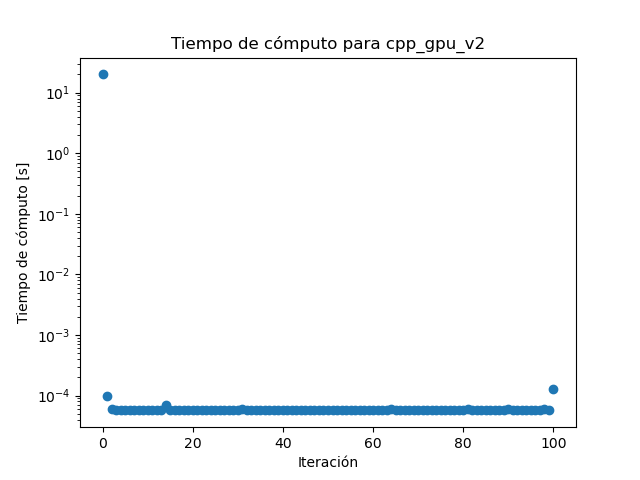

In [23]:
#Grafico t_computo para cpp_gpu_v2
fig, ax = plt.subplots()
N_index = 3
ax.plot(datos[4][N_index], "o")
ax.set_xlabel("Iteración")
ax.set_ylabel("Tiempo de cómputo [s]")
ax.set_title("Tiempo de cómputo para cpp_gpu_v2")
ax.set_yscale("log")


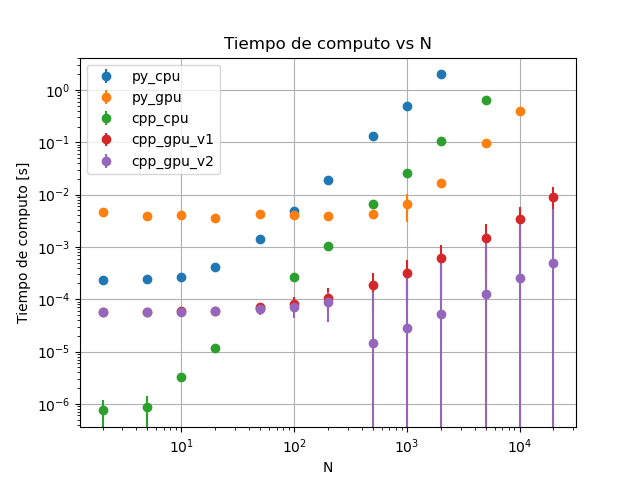

In [13]:
#Grafico t_computo_mean vs N
fig, ax = plt.subplots()

for i in range(len(datos)):
    ax.errorbar(N_array[i], t_computo_mean[i], yerr=t_computo_std[i], fmt="o", label = name[i])

ax.set_xlabel("N")
ax.set_ylabel("Tiempo de computo [s]")
ax.set_title("Tiempo de computo vs N")
ax.legend()
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()


## Speed-up

In [14]:
def sigma_cociente(a, b, sigma_a,sigma_b):
    '''
    Error en la determinación de a/b dados sigma_a y sigma_b
    '''
    return np.sqrt((sigma_a/b)**2 + (a*sigma_b/b**2)**2)

def graph_speedup(i, j):
    '''
    Speed up de índice i sobre índice j
    
    '''
    fig, ax = plt.subplots()
    ax.errorbar(N_array[j], t_computo_mean[i]/t_computo_mean[j], yerr=sigma_cociente(t_computo_mean[i], t_computo_mean[j], t_computo_std[i] ,t_computo_std[j]), fmt="o", label = name[i] + "/" + name[j])
    ax.set_xlabel("N")
    ax.set_ylabel(name[i] + "/" + name[j])
    ax.grid()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title("Speed-up")
    ax.legend()
    plt.plot()

C:\Users\lupam\AppData\Local\Temp\ipykernel_13112\553929596.py:13: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(N_array[j], t_computo_mean[i]/t_computo_mean[j], yerr=sigma_cociente(t_computo_mean[i], t_computo_mean[j], t_computo_std[i] ,t_computo_std[j]), fmt="o", label = name[i] + "/" + name[j])
C:\Users\lupam\AppData\Local\Temp\ipykernel_13112\553929596.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt((sigma_a/b)**2 + (a*sigma_b/b**2)**2)


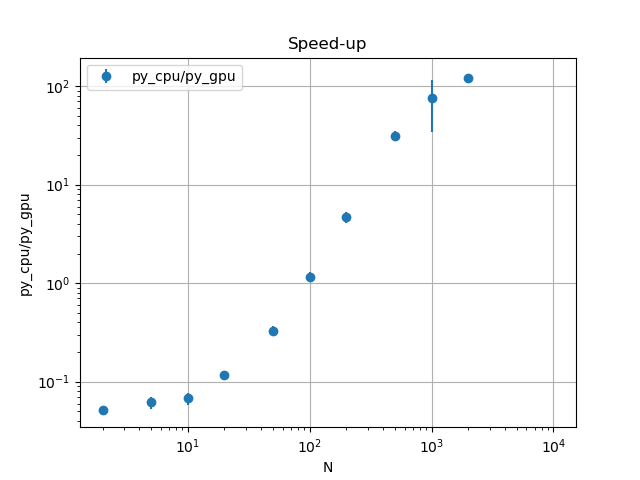

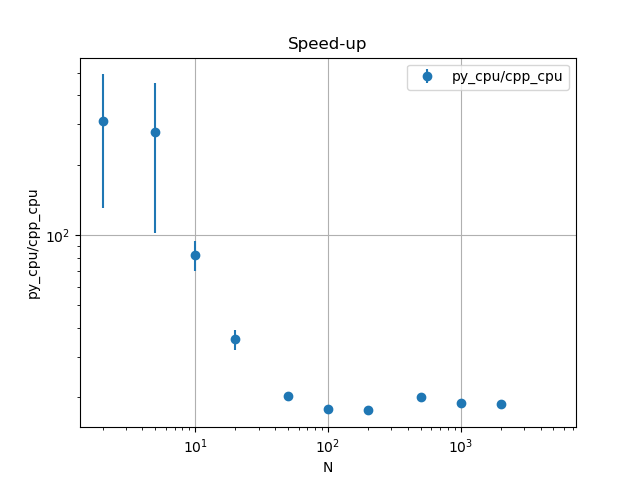

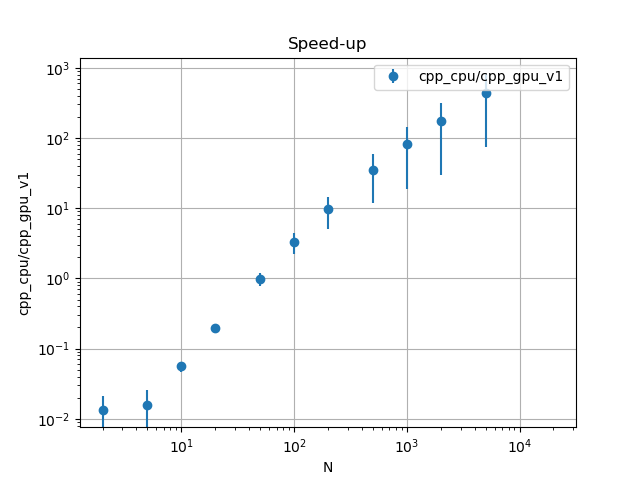

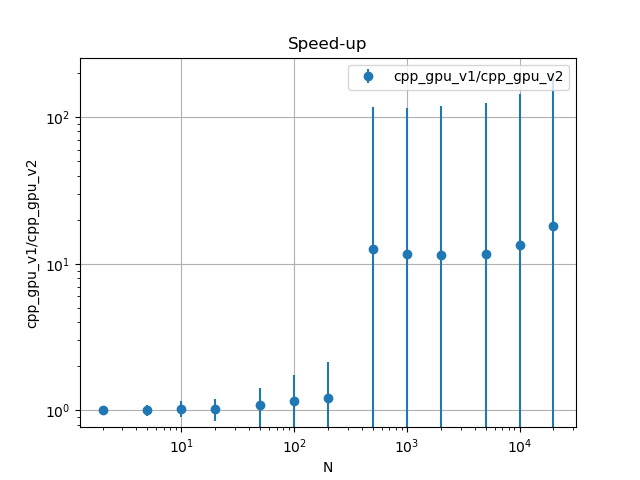

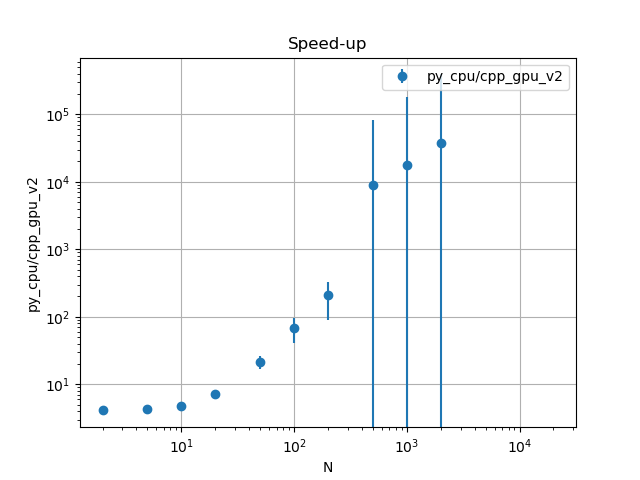

In [15]:
#Grafico cociente entre tiempos de computo


# .py_gpu respecto a py_cpu
graph_speedup(0, 1)

# .cpp_cpu respecto a py_cpu
graph_speedup(0, 2)

# .cpp_gpu_v1 respecto a cpp_cpu
graph_speedup(2, 3)

# .cpp_gpu_v1 respecto a cpp_gpu_v2
graph_speedup(3, 4)

# .cpp_gpu_v2 respecto a py_cpu
graph_speedup(0, 4)